In [22]:
import matplotlib.pyplot as plt
from toolbox import scatter_plot

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Loading the data set

In [2]:
import pandas as pd

url = "https://covid.ourworldindata.org/data/owid-covid-data.json"
json = pd.read_json(url)

data = json["CHE"]["data"]
df = pd.DataFrame(data)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit

new_deaths = df['new_deaths']
new_deaths = new_deaths.dropna()

X = new_deaths.index.values.reshape(-1, 1)
y = new_deaths

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
cv = ShuffleSplit(test_size=0.2, train_size=0.8)

# Testing machine learning models

## Linear Models


### Ordinary Least Squares

Best parameters: {'linear__C': 0.001}
Test set score: 0.19
Best cross-validation accuracy: 0.17


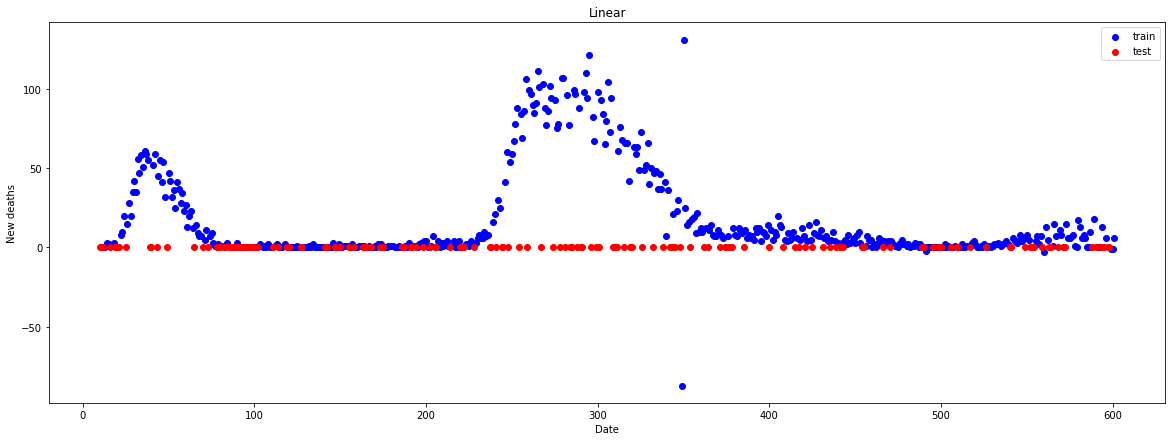

In [36]:
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([("scaler", MinMaxScaler()), ("linear", LinearRegression())]).fit(X_train, y_train)

param_grid = {}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, n_jobs=-1) 
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
scatter_plot(X_train, X_test, y_train, grid.predict(X_test), "Linear")

### Ridge regression

Best parameters: {'ridge__alpha': 1}
Test set score: -0.02
Best cross-validation accuracy: 0.01


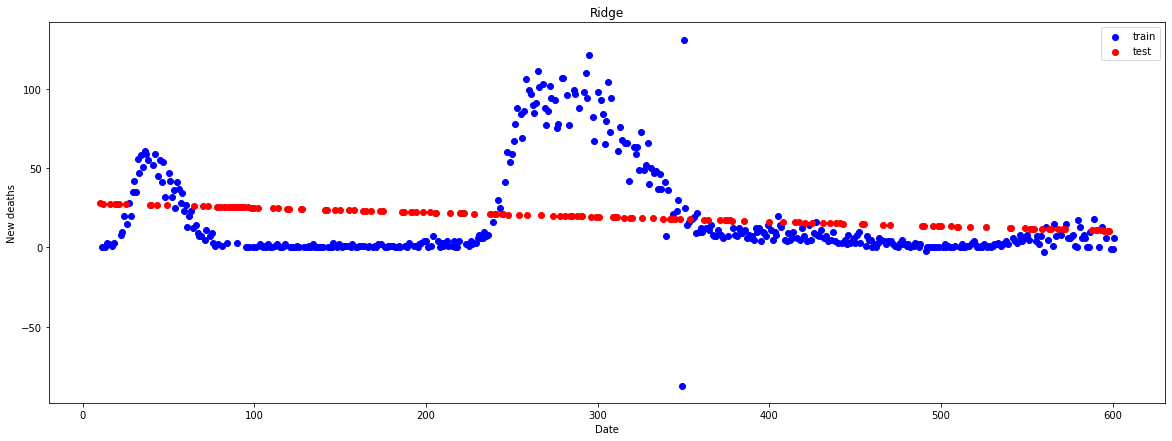

In [29]:
from sklearn.linear_model import Ridge

pipeline = Pipeline([("scaler", MinMaxScaler()), ("ridge", Ridge())]).fit(X_train, y_train)

param_grid = {'ridge__alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, n_jobs=-1) 
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
scatter_plot(X_train, X_test, y_train, grid.predict(X_test), "Ridge")

### Lasso

Best parameters: {'lasso__alpha': 0.1}
Test set score: -0.01
Best cross-validation accuracy: 0.02


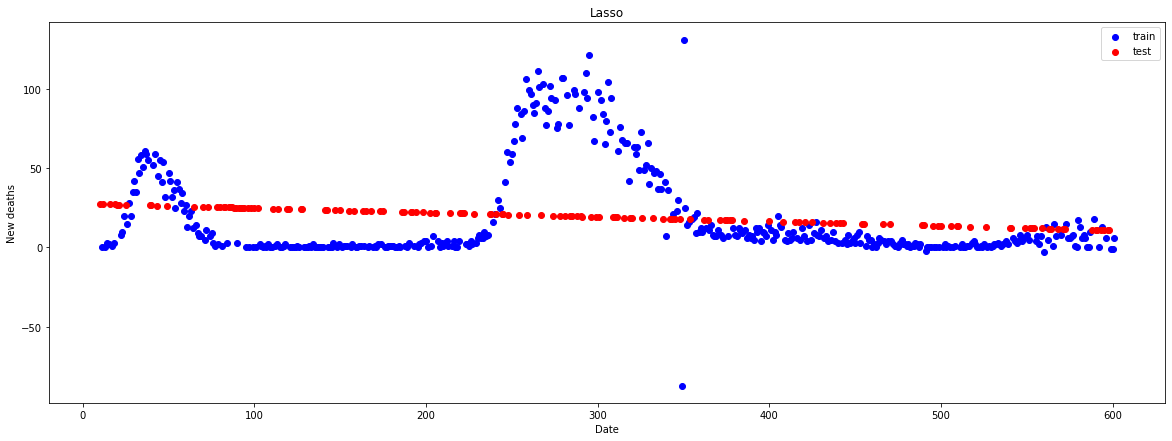

In [28]:
from sklearn.linear_model import Lasso

pipeline = Pipeline([("scaler", MinMaxScaler()), ("lasso", Lasso())]).fit(X_train, y_train)

param_grid = {'lasso__alpha': [0, 0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, n_jobs=-1) # njobs for the number of CPU cores used
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
scatter_plot(X_train, X_test, y_train, grid.predict(X_test), "Lasso")

Best parameters: {'logistic__C': 10}
Test set score: 0.20
Best cross-validation accuracy: 0.17


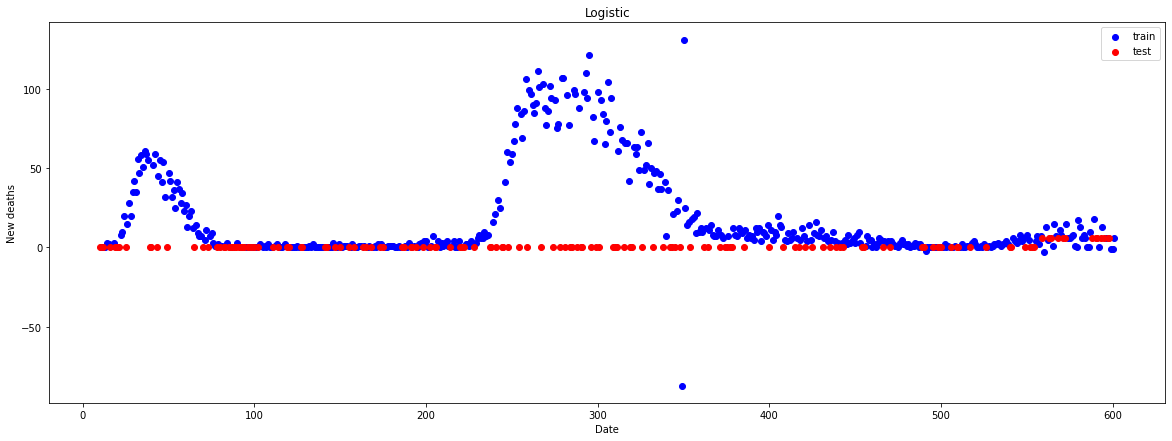

In [38]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())]).fit(X_train, y_train)

param_grid = {'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, n_jobs=-1) 
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
scatter_plot(X_train, X_test, y_train, grid.predict(X_test), "Logistic")

## Naive Bayes Classifiers

### Gaussian

Best parameters: {}
Test set score: 0.19
Best cross-validation accuracy: 0.16


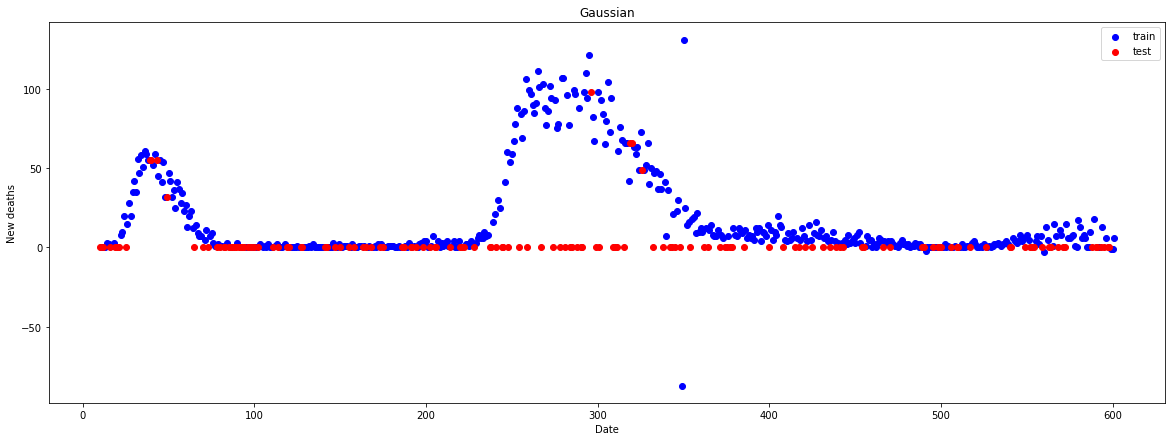

In [39]:
from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline([("scaler", MinMaxScaler()), ("gaussian", GaussianNB())]).fit(X_train, y_train)

param_grid = {}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, n_jobs=-1) 
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
scatter_plot(X_train, X_test, y_train, grid.predict(X_test), "Gaussian")

### Multinomial

Best parameters: {'multinomial__alpha': 0.001}
Test set score: 0.19
Best cross-validation accuracy: 0.15


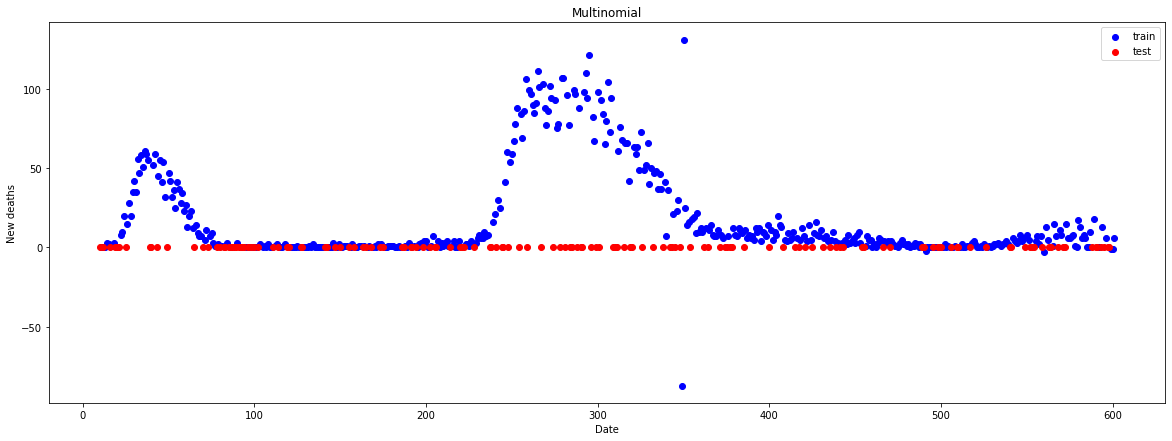

In [41]:
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([("scaler", MinMaxScaler()), ("multinomial", MultinomialNB())]).fit(X_train, y_train)

param_grid = {'multinomial__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, n_jobs=-1) 
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
scatter_plot(X_train, X_test, y_train, grid.predict(X_test), "Multinomial")

## K-Nearest Neighbors

Best parameters: {'knn__n_neighbors': 8}
Test set score: 0.97
Best cross-validation accuracy: 0.86


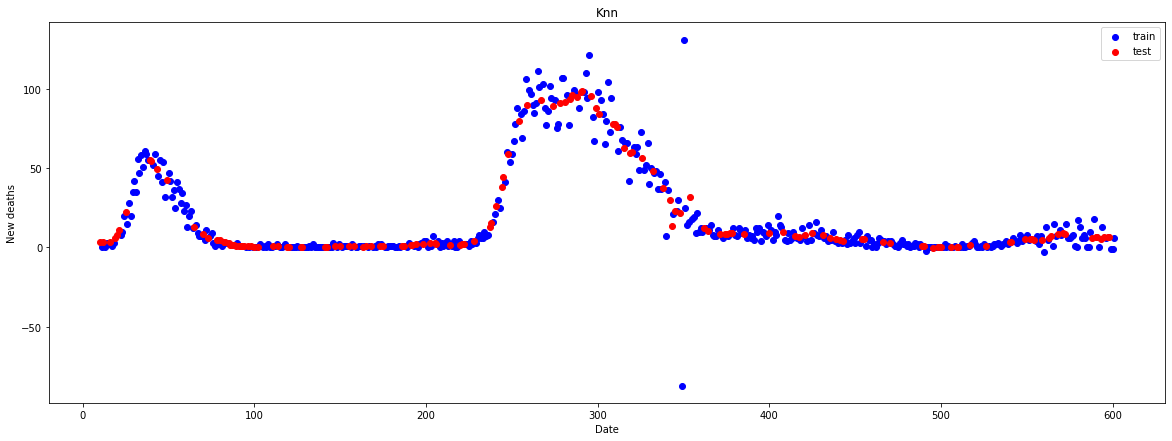

In [34]:
from sklearn.neighbors import KNeighborsRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsRegressor())]).fit(X_train, y_train)

param_grid = {'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, n_jobs=-1) 
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
scatter_plot(X_train, X_test, y_train, grid.predict(X_test), "Knn")

## Support Vector Regression

Best parameters: {'svr__C': 100, 'svr__gamma': 100}
Test set score: 0.95
Best cross-validation accuracy: 0.87


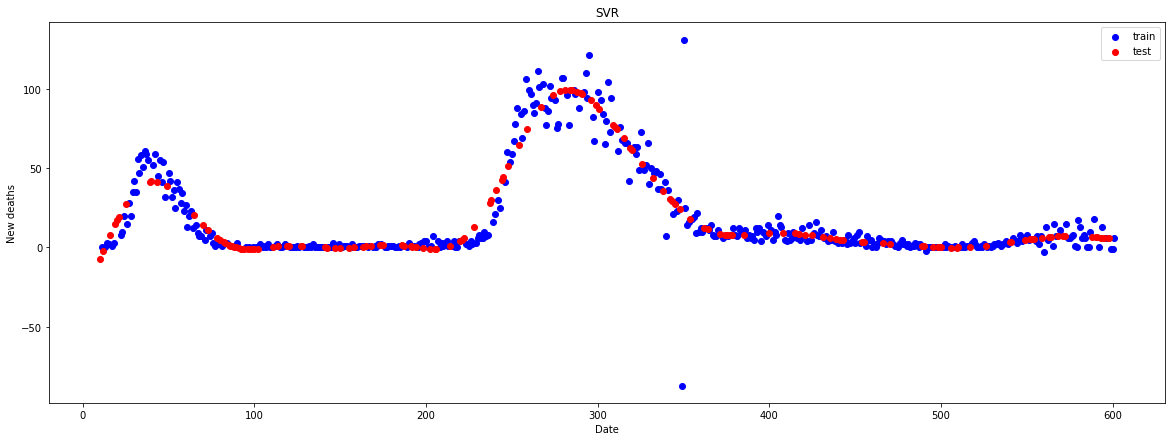

In [26]:
from sklearn.svm import SVR

pipeline = Pipeline([("scaler", MinMaxScaler()), ("svr", SVR())]).fit(X_train, y_train)

param_grid = {'svr__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svr__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, n_jobs=-1) # njobs for the number of CPU cores used
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
scatter_plot(X_train, X_test, y_train, grid.predict(X_test), "SVR")

## Decision Trees


Best parameters: {'tree__max_depth': 5}
Test set score: 0.89
Best cross-validation accuracy: 0.88


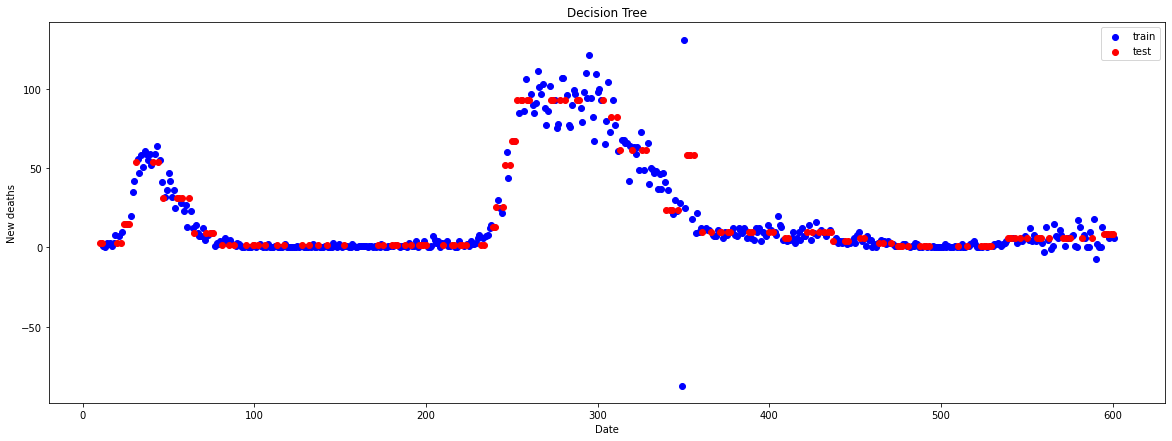

In [57]:
from sklearn.tree import DecisionTreeRegressor

pipeline = Pipeline([("scaler", MinMaxScaler()), ("tree", DecisionTreeRegressor())]).fit(X_train, y_train)

param_grid = {'tree__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=cv, n_jobs=-1) # njobs for the number of CPU cores used
grid.fit(X_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Test set score: {grid.score(X_test, y_test):.2f}")
print(f"Best cross-validation accuracy: {grid.best_score_:.2f}")
scatter_plot(X_train, X_test, y_train, grid.predict(X_test), "Decision Tree")